## Analysis: Kmeans vs DBSCAN

### Author : Deeksha, Divya, Isha

In this notebook we have implemented and compared 2 clustering algorithms- i) K-Means ii) DBSCAN <br>
to find our locations of interest (hotspots)

~ The algorithms are run on 10,000 data points <br>
    -Reason: The current processing and computing power would not scale for the entire dataset <br>
  
~ **Silhouette Score** is the factor used for comparing the performance of the 2 algorithms <br>
    -Reason: _Silhouette score is the ratio of intra-cluster distance vs inter-cluster distance_ <br>
       This score will effectively help me understand how clearly and concisely the datapoints are clustered, which
       is a critical part of my implementation. <br>
      
Based on the silhouette score, the better algorithm is picked for further implementation on the entire dataset

## 1. DBSCAN

In [7]:
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.cluster.vq import kmeans,vq
from scipy.spatial.distance import cdist
import datetime
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler as scalar
from sklearn.cluster import DBSCAN
 
file = '../pre_processing11/levelB1_coordinates_only.csv'
df = pd.read_csv(file, nrows=10000)

/home/opc/anaconda3/envs/tf_keras/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'lng')

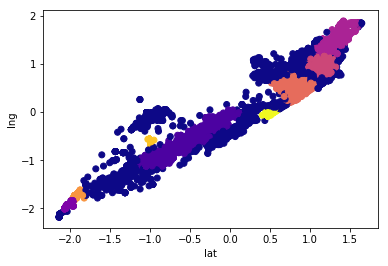

In [22]:
coords = df.as_matrix(columns=['lat', 'lng'])
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
C_scaled = scaler.fit_transform(coords)

dbscan = DBSCAN(eps=0.1, min_samples = 150)
clusters = dbscan.fit_predict(C_scaled)
plt.scatter(C_scaled[:, 0], C_scaled[:, 1], c=clusters, cmap="plasma")
plt.xlabel("lat")
plt.ylabel("lng")

### Silhouette Score for DBSCAN

In [24]:
#Calculating silhouette score of DBSCAN clustering
from sklearn.metrics import silhouette_score as ss
score = ss(df, clusters, metric='euclidean')
score

0.142957012817716

## 2. KMEANS 

In [26]:
#Implementing K-Means Clustering to compare with DBSCAN clustering 
from sklearn.cluster import KMeans
clusterer = KMeans (n_clusters=7, init='k-means++', n_init=5, max_iter=300, tol=0.0001, verbose=2,precompute_distances='auto', random_state=3192, copy_x=True, n_jobs=1, algorithm='auto')
clusterer.fit(df)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 4.433703589079276e-05
start iteration
done sorting
end inner loop
Iteration 1, inertia 4.147655712090649e-05
start iteration
done sorting
end inner loop
Iteration 2, inertia 4.0956418781853405e-05
start iteration
done sorting
end inner loop
Iteration 3, inertia 4.075026301178224e-05
start iteration
done sorting
end inner loop
Iteration 4, inertia 4.06833368951561e-05
start iteration
done sorting
end inner loop
Iteration 5, inertia 4.067264462124722e-05
center shift 2.264156e-06 within tolerance 6.567644e-12
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 4.5211028599444296e-05
start iteration
done sorting
end inner loop
Iteration 1, inertia 4.3229331026782824e-05
start iteration
done sorting
end inner loop
Iteration 2, inertia 4.278024618219269e-05
start iteration
done sorting
end inner loop
Iteration 3, inertia 4.254878328471216e-05
start iteration
done sor

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=5, n_jobs=1, precompute_distances='auto',
    random_state=3192, tol=0.0001, verbose=2)

### Silhouette Score for Kmeans 

In [27]:
# Checking the silhouette score of K-Means for comparison with the silhouette score of DBSCAN Clustering
score_kmeans = ss(df,clusterer.labels_,metric='euclidean')
score_kmeans

0.5251208296345569

Text(0, 0.5, 'lng')

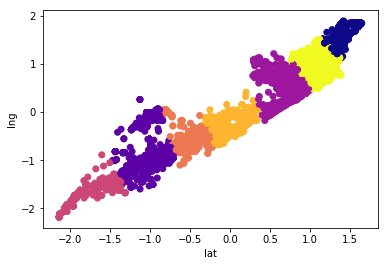

In [29]:
plt.scatter(C_scaled[:, 0], C_scaled[:, 1], c=clusterer.labels_, cmap="plasma")
plt.xlabel("lat")
plt.ylabel("lng")

### As seen above, the silhouette score for kmeans is **0.5251208** whereas for dbscan it is **0.1429**. Hence, we decide to go ahead with Kmeans. Also, Kmeans takes lesser time than DBSCAN to run on the huge dataset that we have. Hence overall, Kmeans would be most suitable for our dataset